In [1]:
df = pd.DataFrame(io.l1b_filenames('inbound', iterator=False), columns=['fname'])
df.size

570

In [2]:
import os
df['basename'] = df.fname.map(os.path.basename)

In [3]:
df.columns

Index(['fname', 'basename'], dtype='object')

In [4]:
# removing echelle for now
df = df[~df.basename.str.contains('-ech')]
# then focusing on FUV data
df = df[df.basename.str.contains('-fuv_')]
# remove data with mode3001
df = df[~df.basename.str.contains('-mode3001-')]

In [5]:
df.basename.size

141

In [6]:
fnames = df.basename.copy()
fnames.sort()

In [11]:
%matplotlib inline

In [12]:
def calc_4_to_3(width):
    return width, width*3/4
plt.style.use('bmh')
plt.rcParams['figure.figsize']= calc_4_to_3(9)
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['lines.linewidth'] = 1
plt.ioff()

In [9]:
l1b = io.L1BReader(fnames.iloc[0])

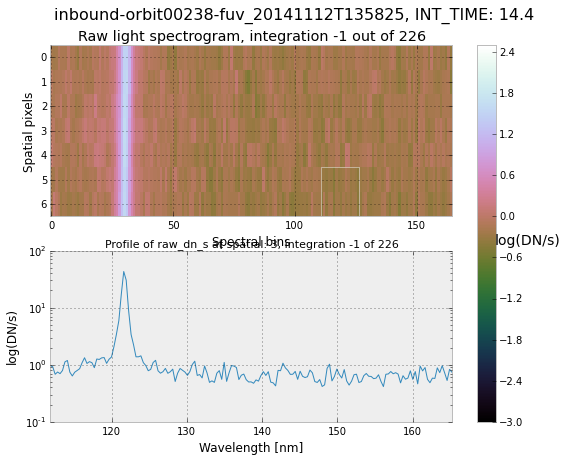

In [14]:
l1b.plot_raw_overview()

In [20]:
def process_fname(fname):
    import os
    l1b = io.L1BReader(fname)
    fig = l1b.plot_raw_overview(-1, save_token='1', imglog=True, 
                                proflog=False, prof_plot_hist=True)
    scaling.do_all(l1b, -1, log=False)
    plt.close('all')
    return "{} done.".format(os.path.basename(fname))

In [21]:
process_fname(fnames.iloc[0])

'mvn_iuv_l1b_inbound-orbit00238-fuv_20141112T135825_v01_r01.fits.gz done.'

In [22]:
import sys
no_detector_dark = []
darkmean_smaller = []
interesting = []
for i,fname in enumerate(fnames):
    print("{} % done.".format(100*i/len(fnames)))
    sys.stdout.flush()
    l1b = io.L1BReader(fname)
    rawmean = l1b.detector_raw.mean()
    try:
        darkmean =l1b.detector_dark.mean()
    except AttributeError as e:
        no_detector_dark.append(fname)
        continue
    if darkmean*100 < rawmean:
        interesting.append(fname)
        print('{}, {:.1f}'.format(i, rawmean/darkmean))

0.0 % done.
0.7092198581560284 % done.
1.4184397163120568 % done.
2.127659574468085 % done.
2.8368794326241136 % done.
3.5460992907801416 % done.
4.25531914893617 % done.
4.964539007092198 % done.
5.673758865248227 % done.
6.382978723404255 % done.
7.092198581560283 % done.
7.801418439716312 % done.
8.51063829787234 % done.
9.21985815602837 % done.
9.929078014184396 % done.
10.638297872340425 % done.
11.347517730496454 % done.
12.056737588652481 % done.
12.76595744680851 % done.
13.47517730496454 % done.
14.184397163120567 % done.
14.893617021276595 % done.
15.602836879432624 % done.
16.31205673758865 % done.
17.02127659574468 % done.
17.73049645390071 % done.
18.43971631205674 % done.
19.148936170212767 % done.
19.858156028368793 % done.
20.56737588652482 % done.
21.27659574468085 % done.
21.98581560283688 % done.
22.69503546099291 % done.
23.404255319148938 % done.
24.113475177304963 % done.
24.822695035460992 % done.
25.53191489361702 % done.
26.24113475177305 % done.
26.95035460992

In [25]:
for fname in fnames[:20]:
    process_fname(fname)

In [43]:
interesting

['mvn_iuv_l1b_inbound-orbit00676-muv_20150204T060224_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00676-muv_20150204T060228_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00676-muv_20150204T060232_v01_s01.fits.gz']

In [69]:
no_detector_dark

['mvn_iuv_l1b_inbound-orbit00241-muv_20141113T001547_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00247-muv_20141114T035244_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00341-muv_20141202T034550_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00389-muv_20141211T075233_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00451-muv_20141223T035444_v01_r01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00899-muvdark_20150318T030704_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00903-muvdark_20150318T211052_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00907-muvdark_20150319T151438_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00911-muvdark_20150320T091823_v01_s01.fits.gz']

In [58]:
len(darkmean_larger)

112

In [59]:
darkmean_larger

['mvn_iuv_l1b_inbound-orbit00894-fuvdark_20150317T075924_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012428_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012445_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012502_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012519_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012537_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012555_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012612_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012629_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012646_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012704_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012722_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00898-muvdark_20150318T012740_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orb

In [60]:
regular_darklarger = ['mvn_iuv_l1b_inbound-orbit00948-fuv_20150327T114841_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00948-fuv_20150327T114841_v01_s02.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00956-fuv_20150328T235556_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00960-fuv_20150329T180023_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00964-fuv_20150330T120448_v01_s01.fits.gz',
 'mvn_iuv_l1b_inbound-orbit00968-fuv_20150331T060909_v01_s01.fits.gz']

In [68]:
for i,fname in enumerate(regular_darklarger[1:]):
    print(fname)
    l1b = io.L1BReader(fname)
    rawmean = l1b.detector_raw.mean()
    try:
        darkmean =l1b.detector_dark.mean()
    except AttributeError as e:
        continue
    if darkmean > rawmean:
        print("Dark:", darkmean)
        print("Light:", rawmean)
        print("Ratio:", darkmean/rawmean)

mvn_iuv_l1b_inbound-orbit00948-fuv_20150327T114841_v01_s02.fits.gz
Dark: 3927.27678571
Light: 3876.74461828
Ratio: 1.01303469081
mvn_iuv_l1b_inbound-orbit00956-fuv_20150328T235556_v01_s01.fits.gz
Dark: 3942.03472222
Light: 3857.40467411
Ratio: 1.02193963436
mvn_iuv_l1b_inbound-orbit00960-fuv_20150329T180023_v01_s01.fits.gz
Dark: 3898.37896825
Light: 3845.37731774
Ratio: 1.01378321193
mvn_iuv_l1b_inbound-orbit00964-fuv_20150330T120448_v01_s01.fits.gz
Dark: 3967.89781746
Light: 3859.84685349
Ratio: 1.02799358837
mvn_iuv_l1b_inbound-orbit00968-fuv_20150331T060909_v01_s01.fits.gz
Dark: 4125.79563492
Light: 3851.95024758
Ratio: 1.0710926595


In [62]:
for fname in regular_darklarger:
    process_fname(fname)

In [9]:
from IPython.parallel import Client
c = Client()
dview = c.direct_view()
lbview = c.load_balanced_view()

In [10]:
%%px
def calc_4_to_3(width):
    height = width * 3 / 4
    return (width, height)
from iuvs import io, scaling, plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize']= calc_4_to_3(9)
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['lines.linewidth'] = 1
plt.ioff()

In [11]:
ret = lbview.map_async(process_fname, df.fname)

In [12]:
for res in ret:
    print(res)

mvn_iuv_l1b_APP1-orbit00087-mode1441-fuv_20141014T141802_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1441-muv_20141014T141914_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1443-muv_20141014T142730_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1442-muv_20141014T142258_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1442-fuv_20141014T142522_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1442-muv_20141014T142446_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1441-muv_20141014T141838_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1443-fuv_20141014T142654_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1444-fuv_20141014T142804_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1441-fuv_20141014T141726_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1444-muv_20141014T142758_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1442-fuv_20141014T142410_v01_r01.fits.gz done.
mvn_iuv_l1b_APP1-orbit00087-mode1444-muv_20141014T14